In [1]:
import utils
from utils import *

# Don't remove this, calculations below depend on correct action being 1

def default_params():
    """ These are the default parameters used in the framework. """
    return {
            # Runner parameters
            'max_steps': 120,
            'num_episodes': 1,
            'num_actions': 7, 
            'start_action': 0, 
            'correct_action': 1,    # Zero indexed 
            # Optimization parameters
            'alpha': 0.5,
            'alpha_decay': 40,
            'alpha_min': 0.001,
            # Exploration parameters
            'epsilon': 1,
            'epsilon_decay': 20,
            'epsilon_min': 0.01,    
            'gamma': 0.95,
            'plots': False,
            'noise': True,
            'surrogate': False,
            'surrogate_c_interval': 50,
            'surrogate_c_interval_min': 0,
           }

## Surrogate

Let's give the surrogate the best conditions to calculate the noise matrix: 
a lot of steps, and let's re-estimate it on every step. 

Assert: the agent will perfectly estimate the noise matrix

However, this does not make the Q-values converge: 
- The rewards are still coming in randomly
- so even though the surrogate tries to conver each to the "true" rewards
- it's still receiving noisy rewards. That confuses the q value

TODO: Take the mean of each q-value across all the episode
== the `.smooth` method in the perturbed rewards case

100%|██████████| 1/1 [00:16<00:00, 16.90s/it]


Accuracy: 0.0
Mean episode length: 10000.0
Last reward processor:
Estimated confusion matrix:


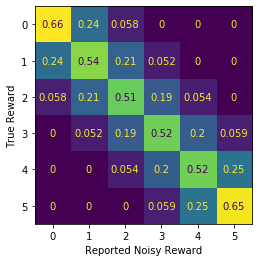

Reward sets:
(0, 0): [-2, -1, -1, 0, -2, -1, 0, 0, -1, -2, -2, -2, -1, -1, 0, -1, 0, -1, -1, -1, 0, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, 0, -1, -2, -1, -2, -3, -1, -2, -1, -1, 0, -1, -1, -2, -1, 0, -1, -2, -1, 0, 0, -2, -1, -1, -1, -1, -1, -2, 0, -1, -1, -1, 0, -2, -1, -1, -1, -2, -1, -2, -1, -1, -2, -2, -2, 0, 0, -1, 0, -1, -2, -2, -1, -1, 0, -2, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, 0, -2, -1, -1, -2, -1, 0, -1, -1, 0, -2, 0, 0, -1, -1, -2, -1, -1, -2, -1, 0, 0, -1, -1, -1, 0, -1, 0, -1, -1, -2, 0, -3, -1, -1, -1, -1, -1, -1, -3, -2, 0, -2, -3, -1, -2, -3, -1, -1, -3, -2, 0, -1, -2, 0, -2, -2, -2, -1, -1, -1, -2, -1, -1, -1, -1, -3, -1, -1, -2, -2, -1, 0, -1, -2, -1, -2, -1, 0, -1, 0, -1, 0, -1, -1, -1, -1, -2, -1, -2, 0, -1, -2, 0, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -3, -2, -1, -1, 0, -2, -1, -1, -3, -1, -1, -1, -1, 0, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, 0, -2, 0, -2, -1, -1, -1, -2, -1, 0, -2, -1, -2, -2, -2, -2, -1, -1, -2,

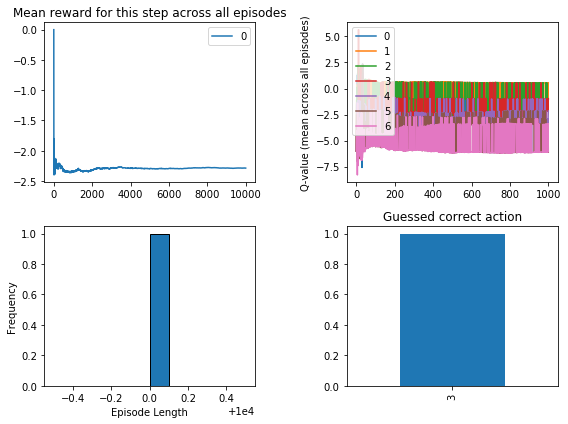

array([-0.9828,  0.5369, -0.9829, -0.9782, -2.1472, -6.1179, -3.3956])

In [2]:
params_new = {
    'max_steps':10000,
    'num_episodes': 1,
    'plots': True, 
    'noise': True,
    'surrogate': True,
    'epsilon': 1.0,
    'epsilon_min': 1.0,
    # Optimization parameters
    'alpha': 1.0,
    # 'alpha_decay': 500,
    'alpha_min': 1.0,
    'gamma': 0.0,
    'surrogate_c_interval': 1,
    'surrogate_c_interval_min': 0,
    'stationary_noise': False,   
    }

params = default_params() | params_new
plot_mean_q_values(params = params)

# Surrogate rewards with stationary noise

100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


Accuracy: 100.0
Mean episode length: 10000.0
Last reward processor:
Estimated confusion matrix:


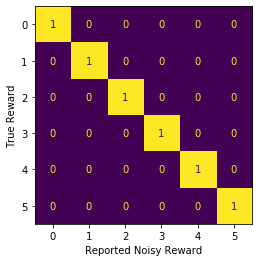

Reward sets:
(0, 0): [-1, -3, 0, -2, -2, 0, -1, -1, -1, -3, 0, -1, -1, -1, -1, -2, -1, -2, -3, -3, -2, -1, 0, -1, -1, -1, 0, -1, -2, -1, 0, -2, -3, -1, 0, -2, 0, -2, -1, -1, -1, -2, -1, -2, 0, -2, -1, -2, -2, -1, 0, -1, -2, 0, 0, -1, 0, -2, 0, -1, -1, -1, -2, -1, -2, -1, -1, -1, 0, -1, -1, -1, 0, -1, -1, -1, 0, -1, -1, -2, -1, -1, -3, -1, -2, -1, -1, -1, -3, 0, -2, -1, -2, -1, 0, -1, -1, -1, -1, -1, -1, -2, 0, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, 0, -1, 0, -1, -2, -1, -1, -2, 0, -2, -1, 0, 0, -1, -1, -1, -1, 0, -1, -1, -1, 0, 0, -1, -1, -1, 0, 0, -3, -3, -1, -1, -1, -1, -2, -2, -2, -1, -2, -2, -1, -1, 0, -2, -1, 0, -1, 0, -1, -1, -1, 0, -2, -2, -1, -2, 0, 0, -1, 0, -1, -2, 0, -1, -1, -2, 0, 0, 0, -1, -1, -1, 0, 0, -2, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -2, -1, 0, -2, 0, -1, -2, -2, 0, -1, -1, -1, -1, -2, -1, -1, -1, -1, -2, -2, -2, -1, -1, -2, -2, -3, -1, -1, -1, 0, -1, -2, -1, -1, -1, 0, -1, -1, -1, 0, -1, -2, -2, 0, 0, -1, -1, -2, -1, 0, -1, -1,

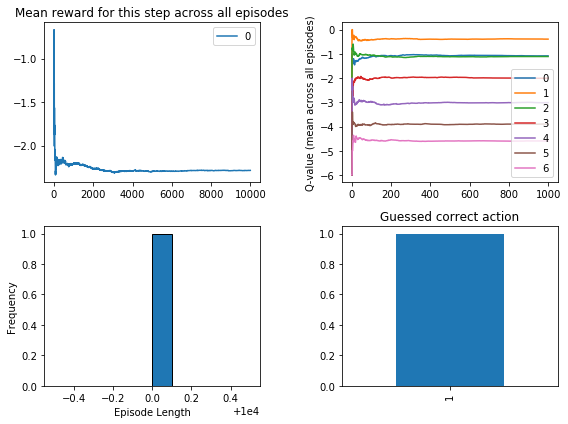

array([-1.0828, -0.3911, -1.1089, -2.0042, -3.0137, -3.8983, -4.5984])

In [3]:
# This changes if we assume stationary noise, and take the mean as the reward.
# At this point we also assumed a simetrical matrix, and row normalization to 1
# But this stationary assumption, with the below parameters, is basically
# Thompson sampling.

params_new = {
    'max_steps':10000,
    'num_episodes': 1,
    'plots': True, 
    'noise': True,
    'surrogate': True,
    'epsilon': 1.0,
    'epsilon_min': 1.0,
    # Optimization parameters
    'alpha': 1.0,
    # 'alpha_decay': 500,
    'alpha_min': 1.0,
    'gamma': 0.0,
    'surrogate_c_interval': 1,
    'surrogate_c_interval_min': 0,
    'stationary_noise': True,   
    }

params = default_params() | params_new
plot_mean_q_values(params = params)

In [4]:
# The q value of the correct action (1) will converge to 
# the expected reward, given the true reward is 0
0.67*0 + 0.27*-1 + 0.067*-2

-0.404

In [5]:
# Same for the expected q-value of actions 0 and 2
0.21*0 + 0.53*-1 + 0.21*-2 + 0.053*-3

-1.109

# Explore-exploit tradeoff in action

100%|██████████| 1000/1000 [00:02<00:00, 408.12it/s]


Accuracy: 97.3
Mean episode length: 75.0
Last reward processor:
Estimated confusion matrix:


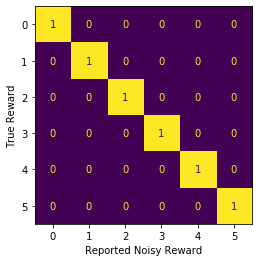

Reward sets:
(0, 0): [0, 0, -2, 0, -1, -1, -1, -1, 0, -1, -1, -2]
(0, 1): [0, 0, 0, -1, -1, 0, 0, 0]
(0, 2): [-1, 0, -1, -1, -1, -1, -2]
(0, 3): [-3, -4, -3, -2, -2, -1, -1, -3, -3, -2]
(0, 4): [-4, -3, -3, -3, -2, -3, -3, -2, -3, -3]
(0, 5): [-3, -4, -5, -4, -4, -4, -4, -4, -4, -4, -5, -4, -5, -4, -3, -5, -4]
(0, 6): [-5, -4, -5, -4, -5, -5, -4, -4, -5, -4]
Reward set counts:
Key (0, 0): 12 items
Key (0, 1): 8 items
Key (0, 2): 7 items
Key (0, 3): 10 items
Key (0, 4): 10 items
Key (0, 5): 17 items
Key (0, 6): 10 items


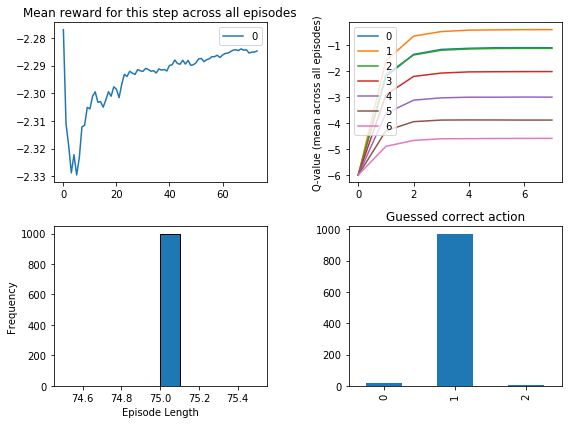

array([-1.0976122, -0.4008496, -1.1237404, -2.0164098, -3.0021277,
       -3.8849106, -4.5910945])

In [6]:
# If our convergence criteria is - highest q value at the end of the episode,
# Then the most perofrmant algorithm seems to be this one, that explores as
# much as possible, and never exploits. Because the exploit is forced onto it
# at the end of the episode. Meaning, a constant epsilon of 1 will performs best
params_new = {
    'max_steps': 75,
    'num_episodes': 1000,
    'plots': True, 
    'noise': True,
    'surrogate': True,
    'stationary_noise': True,    
    'epsilon': 1.0,
    'epsilon_min': 1.0,
    # Optimization parameters
    'alpha': 1.0,
    # 'alpha_decay': 500,
    'alpha_min': 1.0,
    'gamma': 0.0,
    'surrogate_c_interval': 1,
    'surrogate_c_interval_min': 0,     
    }

params = default_params() | params_new
plot_mean_q_values(params = params)

Let's see what happens with the accuracy, as we decrease max_steps

In [20]:
params_new = {
    'max_steps': 120,
    'num_episodes': 1000,
    'plots': False, 
    'noise': True,
    # 'surrogate': False,    
    'surrogate': True,
    'stationary_noise': True,     
    'epsilon': 1.0,
    'epsilon_min': 1.0,
    # Optimization parameters
    'alpha': 1.0,
    # 'alpha_decay': 500,
    'alpha_min': 1.0,
    'gamma': 0.0,
    'surrogate_c_interval': 1,
    'surrogate_c_interval_min': 0,     
    }

params = default_params() | params_new

performance_results = []

for m in range(120, 10, -10):
    params['max_steps'] = m
    q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
    performance_results.append((np.mean(episode_lengths), accuracy))


100%|██████████| 1000/1000 [00:00<00:00, 1573.04it/s]


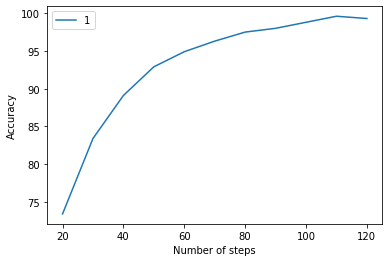

In [21]:
# Plot performance results. The first column is the "Number of steps". It is on
# the x axis. The second column is the "Accuracy". It is on the y axis.
pd.DataFrame(performance_results).plot(x=0, y=1, xlabel='Number of steps', ylabel='Accuracy')

# This is equivalent to the q-values plots

100%|██████████| 1/1 [00:00<00:00, 808.46it/s]

Accuracy: 100.0
Mean episode length: 20.0
Last reward processor:
Estimated confusion matrix:


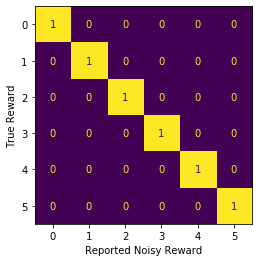

Reward sets:
(0, 1): [0, 0, -1, 0, -1, -1]
(0, 2): [0, 0, -2, -3]
(0, 3): [0, -3, -2]
(0, 4): [-3]
(0, 5): [-4, -4, -3]
(0, 6): [-4, -5]
Reward set counts:
Key (0, 1): 6 items
Key (0, 2): 4 items
Key (0, 3): 3 items
Key (0, 4): 1 items
Key (0, 5): 3 items
Key (0, 6): 2 items


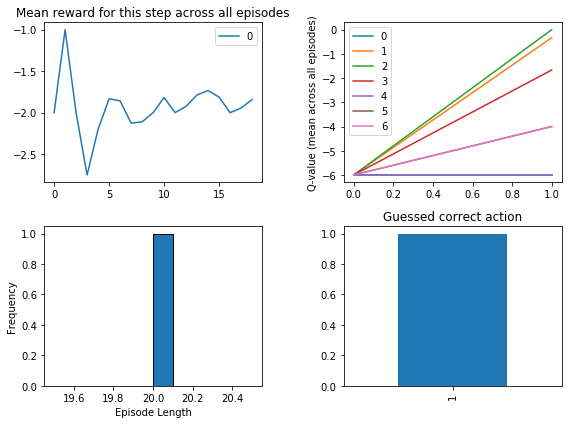

array([-6.    , -0.3333,  0.    , -1.6667, -6.    , -4.    , -4.    ])

In [4]:
# Let's see what happens when we set the number of steps to very low
params_new = {
    'max_steps': 20,
    'num_episodes': 1,
    'plots': True, 
    'noise': True,
    # 'surrogate': False,    
    'surrogate': True,
    'stationary_noise': True,     
    'epsilon': 1.0,
    'epsilon_min': 1.0,
    # Optimization parameters
    'alpha': 1.0,
    # 'alpha_decay': 500,
    'alpha_min': 1.0,
    'gamma': 0.0,
    'surrogate_c_interval': 1,
    'surrogate_c_interval_min': 0,     
    }

params = default_params() | params_new
plot_mean_q_values(params = params)